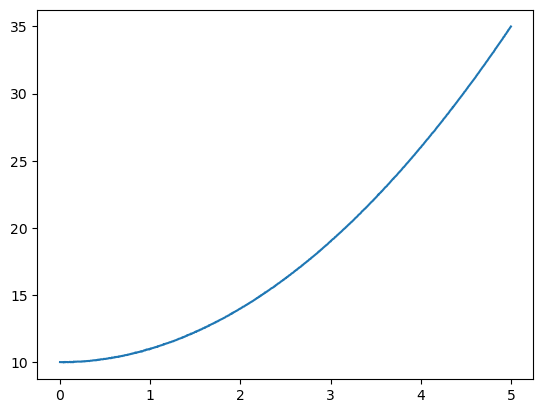

true weight:1 true bais:10
origin weight:0.0000 origin bais:0.0000
loss:0.00029 min_loss:0.00029
epoch:    0  min_epoch    0
best-> weight:1.290 bais:2.750
now--> weight:1.290 bais:2.750
----------------------------------------
loss:0.00018 min_loss:0.00018
epoch:    1  min_epoch    1
best-> weight:1.226 bais:4.351
now--> weight:1.226 bais:4.351
----------------------------------------
loss:0.00011 min_loss:0.00011
epoch:    2  min_epoch    2
best-> weight:1.176 bais:5.598
now--> weight:1.176 bais:5.598
----------------------------------------
loss:0.00007 min_loss:0.00007
epoch:    3  min_epoch    3
best-> weight:1.137 bais:6.570
now--> weight:1.137 bais:6.570
----------------------------------------
loss:0.00004 min_loss:0.00004
epoch:    4  min_epoch    4
best-> weight:1.107 bais:7.327
now--> weight:1.107 bais:7.327
----------------------------------------
loss:0.00003 min_loss:0.00003
epoch:    5  min_epoch    5
best-> weight:1.083 bais:7.918
now--> weight:1.083 bais:7.918
--------

In [1]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1314)
t_weight,t_bais = 1,10
weight =  torch.tensor(0.,requires_grad=True)
bais   =  torch.tensor(0.,requires_grad=True)

x_train = torch.linspace(0,5,1000)
y_train = t_weight*x_train**2 + t_bais + torch.randn(1000)*0.01
device  = torch.device('cuda' if torch.cuda.is_available else 'cpu')

plt.plot(x_train,y_train)
plt.show()

lr = 0.001
print("true weight:%d true bais:%d"%(t_weight,t_bais))
print("origin weight:%.4f origin bais:%.4f"%(weight,bais))

min_epoch = -1
mini_loss = torch.inf
pred_weight = 0
pred_bais   = 0
loss = 0
nepoch=100
optimizer = torch.optim.SGD([weight,bais],lr)
for epoch in range(nepoch):
    for index in range(len(x_train)):
        pred = weight*x_train[index]**2+bais
        loss = 1/2*(y_train[index]-pred)**2
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # grad_weight = -(y_train[index]-pred)*(x_train[index])**2
        # grad_bais   = -(y_train[index]-pred)

        # weight-=lr*grad_weight
        # bais-=lr*grad_bais
    if loss < mini_loss:
        mini_loss = loss
        min_epoch = epoch
        pred_weight = weight
        pred_bais   = bais
    print("loss:%5.5f min_loss:%5.5f"%(loss,mini_loss))
    print("epoch:%5d  min_epoch%5d"%(epoch,min_epoch))
    print("best-> weight:%5.3f bais:%5.3f"%(pred_weight,pred_bais))
    print("now--> weight:%5.3f bais:%5.3f"%(weight,bais))
    print("----------------------------------------")
    
    
